# Minuit Tutorial: Fit Cosmological Models to Type 1a Supernova Data
### Created:  Summer 2017 Harrison B. Prosper
## Introduction
In this tutorial, I show how to use the CERN function minimization package Minuit, created by CERN scientist Dr. Fred James and released with the CERN data analysis package __[ROOT](http://root.cern.ch)__, to perform simple fits of cosmological models to Type 1a supernova data. For completeness, I start with a bit of background to this problem.

__prerequisite__: some familiarity with __[Python](http://www.python.org)__ and __[ROOT](http://root.cern.ch)__ is helpful.

A __[Type Ia supernova](https://en.wikipedia.org/wiki/Type_Ia_supernova)__ is thought to be the thermonuclear detonation of a carbon-oxygen white dwarf whose mass has reached the __[Chandrasekhar limit](https://en.wikipedia.org/wiki/Chandrasekhar_limit)__ of about 1.4 times the mass of the Sun. Beyond that mass limit, the "quantum pressure" of the electrons due to the Pauli exclusion principle is insufficient to keep the white dwarf stable. The favored model is a binary system in which a white dwarf accretes hydrogen from its red giant partner until the white dwarf reaches the point of thermonuclear instability. The fact that roughly the same mass explodes each time, namely 1.4 solar masses, and that the energy released yields an immensely luminous event, makes Type 1a supernovae excellent markers for measuring cosmological distances. Moreover, through a simple empirical procedure, it is possible to convert these explosions into standard candles. Given a standard candle, that is, a system of known luminosity and therefore known intrinsic brightness, and given the system's apparent brightness, the inverse square law can be used to infer the distance to the system. If we can determine the distance and redshift $z = (\lambda_o - \lambda_e)/ \lambda_e$ for many Type 1a supernovae, we can use these data to infer the parameters of cosmological models. The observed wavelength $\lambda_o$ is readily measured, while the emitted wavelength $\lambda_e$, that is, the wavelength of the light emitted by the supernova in its rest frame, can be inferred by identifying the known spectral lines of the excited atoms and molecules.

Current cosmological models of the universe are based on the __1st Friedmann equation__,

$$\left(\frac{\dot{a}}{a} \right)^2 = \frac{8\pi G}{3}\rho(a) - \frac{K c^2}{a^2} + \frac{\Lambda c^2}{3},$$

and the __Friedmann-Lemaitre-Robertson-Walker__ (FLRW) metric

$$ds^2 = (c dt)^2 - a^2(t)\left[ \frac{dr^2}{1 - Kr^2} + r^2 (d\theta^2 + \sin^2\theta \, d\phi^2) \right],$$ 

where $a(t)$ is a dimensionless function, called the __scale factor__, that models how __proper distances__ change with cosmic time $t$. The proper distance is the spacetime separation between *simultaneous* events. By convention, the scale factor is normalized so that $a(t_0) = 1$ at the present epoch $t_0$, which is the elapsed time since the Big Bang, defined by $a(0) = 0$. $G$ is the gravitational constant, $c$ the speed of light in vacuum, $\dot{a} \equiv da/dt$, and $\rho c^2$ is the density of all forms of energy excluding that due to the cosmological constant $\Lambda$. The constant $K$, which has units of inverse area, is the global curvature of space. 

Care must be exercised in interpreting the symbols of any metric. For example, the radial coordinate $r$ is not necessarily the proper distance between the center of the sphere at $r = 0$ and the sphere! The operational meaning of the radial coordinate $r$ is simply $r = \sqrt{A \, / \, (4\pi)}$, where $A$ is the proper area of the sphere centered at $r = 0$, *today*. The proper distance between any two nearby galaxies today, when by choice $a(t_0) = 1$, is the square root of the term in square brackets in the FLRW metric. That distance, $d\chi$, is called the __comoving distance__. It is comoving because the coordinate grid that defines it expands with the universe. Therefore, if a galaxy is stationary with respect to this expanding grid, its comoving coordinates (relative to some origin) do not change. By choice, comoving distances match proper distances today; at any other time $t$, the proper distance between any two galaxies that are not necessarily nearby is given by 

$$d(t) = a(t) \, \chi.$$ 

The motion of galaxies relative to the expanding comoving grid, the so-called perculiar motion, is small (roughly on the order of 200 km/s) compared with the speed of light. Therefore, on the scale of millions of years, it is a very good approximation to presume that the same time $t$ since the Big Bang can be assigned to all galaxies, that is, that all galaxies share the same surfaces of simultaneity. This is just as well, because it makes it possible to describe the evolution of the universe in a way that is not specific to our particular circumstance. Ironically, however, this is a highly non-relativistic way to conceptual spacetime. In principle, spacetime is to be regarded as a completed 4-dimensional "thing" that doesn't evolve; spacetime just is!

Without loss of generality, the comoving distance between any two galaxies can be oriented to lie along the radial direction, for which $d\theta = d\phi = 0$. Since, by definition, the comoving distance is the proper distance between galaxies today, it follows that 

$$\chi = \int_0^r \frac{dr^\prime}{\sqrt{1 - K r^{\prime 2}}} = \sin^{-1}(\sqrt{K} \, r) / \sqrt{K},$$

or 

$$r = \sin(\sqrt{K}\chi)/\sqrt{K}.$$ 

Note that $r = \chi$ when $K = 0$, that is, if the global geometry of space is flat.

### First Friedmann Equation
Consider the scaling law $d(t) = a(t) \, \chi$ and its derivative $\dot{d} = \dot{a} \, \chi$ with respect to the universal time $t$. If we interpret $v(t) = \dot{d}$ as the proper velocity of the expansion, then we arrive at the general form of Hubble's law

$$v(t) = H(t) \, d(t),$$

where $H(t) = \dot{a} / a$ is called the __Hubble parameter__ and __Hubble's constant__ is $H_0 = H(t_0)$. Therefore, the Friedmann equation at time $t_0$, when the current matter density is $\rho(1) = \rho_0$, is 

$$H_0^2 = \frac{8\pi G}{3}\rho_0 - K c^2 + \frac{\Lambda c^2}{3},$$

or, equivalently,

$$1 = \frac{8\pi G}{3H_0^2}\rho_0 - \frac{K c^2}{H_0^2} + \frac{\Lambda c^2}{3 H_0^2}.$$

Two things are clear. First, each term on the right-hand side is dimensionless, suggesting that it might be useful to define the dimensionless quantities 

\begin{eqnarray}
    \Omega_M(a) & = & \frac{8\pi G}{3H_0^2}\rho(a), \\
    \Omega_K(a) & = & - \frac{K c^2}{H_0^2} \frac{1}{a^2}, \\
    \Omega_\Lambda & = & \frac{\Lambda c^2}{3 H_0^2},
\end{eqnarray}

with $\Omega(a)$ the sum of all components that contribute to the expansion. This allows the 1st Friedmann equation to be written in the compact form,

<div class="alert alert-block alert-warning">$$\dot{a} = H_0 a \sqrt{\Omega(a)}.$$</div>

Second, the quantities $\Omega_M \equiv \Omega_M(1)$, $\Omega_K \equiv \Omega_K(1)$, and $\Omega_\Lambda$, at $t_0$ when $ a(t_0) = 1$, satisfy the sum rule

$$\Omega_M + \Omega_K + \Omega_\Lambda = 1.$$

In order to reduce clutter, the dimensionless symbols written *without* the dependence on $a$ will be taken to be the values of the functions evaluated at $a = 1$. (The alternative convention is to append the subscript 0 to each symbol to denote its value today.)
Note: the sum rule implies that $\Omega(a)$ must equal $1$ when $a = 1$. 

## Cosmological Models
For our purposes, a cosmological model is a mathematical description of how the dimensionless density $\Omega(a)$ in the model universe evolves with the scale factor $a$ together with dependence of the scale factor on the universal time $t$, obtained by solving the (1st) Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}.$

In this tutorial, we consider two cosmological models, the standard model of cosmology $\Lambda\textrm{CDM}$ in which on every surface of simultanaeity (aka 3D space!) the model universe is filled with a homogeneous distribution of massless particles, a pressureless dust of galaxies, and a cosmological constant $\Lambda$. The second model (which I cooked up during an introductory class I taught on modern physics) is a phantom energy model in which the validity of the Friedmann equation is assumed. 

### $\Lambda\textrm{CDM}$ Model
During most of the history of the universe, the energy density due to massless particles is negligible. Therefore, in a universe in which matter is conserved, we can write

$$\Omega_M(a) = \frac{\Omega_M}{a^3}.$$

This makes sense because if we double proper distances, we expect the matter density to go down by $2^3$. The $\Lambda\textrm{CDM}$ model is therefore defined by

$$\Omega(a) = \frac{\Omega_M}{a^3} + \frac{1 - \Omega_M - \Omega_\Lambda}{a^2} + \Omega_\Lambda,$$

where $\Omega_M$, $\Omega_\Lambda$, and $H_0$ are the free parameters of the model.

### A Phantom Energy Model
This model is defined by

$$\Omega(a) = \frac{e^{a^n - 1}}{a^3},$$

and the parameters $n$ and $H_0$. Given the degeneracy inherent in the Friedmann equation, any model $\Omega(a)$ is consistent with infinitely many universes, each differing in content! For example, it is possible to regard the phantom energy model as one in which the phantom energy is coupled to matter in such a way that 

$$\Omega(a) = \frac{\Omega_M}{a^3} + \frac{e^{a^n - 1} - \Omega_M}{a^3}.$$

But, since neither the curvature parameter $\Omega_K$ nor the mass parameter $\Omega_M$ are identifiable in this model, we can choose their values at will. In particular, in order to be consistent with observations, we can choose  $\Omega_K = 0$ and $\Omega_M \approx 0.30$!

Interestingly, this model can  be integrated exactly. We find that

$$H_0 t = \sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n), \, a^n \, / \, 2) \, / \, n,$$

with a future singularity (dubbed the "Big Rip") occuring in the limit $a \rightarrow \infty$, but at a finite time given by

$$H_0 \, t_\textrm{rip} = \sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n)) \, n$$

where $\Gamma(s, x) = \int_0^x \, t^{s - 1} \, e^{-t} \, dt$ is the 
__[incomplete gamma function](http://mathworld.wolfram.com/IncompleteGammaFunction.html)__.

## Distance Modulus
In a non-expanding universe, the energy flux $f$ from a supernova of luminosity $L$ (in watts), is given by the inverse square law, 

$$f = \frac{L}{4 \pi \, r^2}.$$ 

However, in an expanding universe, the luminosity crossing a sphere of proper area $A = 4 \pi \, r^2$ is reduced by the factor $(1 + z)^2$; one factor of $(1 + z)$ arises from the reduction in a photon's energy by the time it reaches the sphere due to the expansion of the universe, and another factor arises from the lower rate at which photons arrive, again because of the expansion. Therefore, in an expanding universe the flux through the sphere today is given by 

$$f = \frac{L}{4 \pi \, d_L^2},$$ 

where
<div class="alert alert-block alert-warning">
\begin{eqnarray}
    d_L & = & (1 + z) \, r, \\
    & = & (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K},
\end{eqnarray}
</div> is called the __luminosity distance__.

Astronomers are fond of odd units. Rather than work with flux, they use apparent magnitude $m$, defined by $f = q 10^{-2 m / 5} = L / (4 \pi d_L^2),$ 
where $q$ is the flux of objects of zero magnitude. In addition, astronomers define an absolute magnitude $M$ through $f_M = q 10^{-2 M / 5} = L /(4 \pi d_M^2).$

The absolute magnitude of an object is its apparent magnitude if it were placed at a distance of $d_M = 10\,\textrm{parsecs}$, that is, $10^{-5}$ mega-parsecs (Mpc). The standard measure of distance used in observational cosmology is the __distance modulus__ $\mu \equiv m - M$, which, noting that $f_M / f = 10^{2 (m - M)/5} = (d_L / 10^{-5})^2$, is given by

<div class="alert alert-block alert-warning">
    $$\mu = 5 \log_{10}[(1+z) d_L] + 25.$$
</div>



## Comoving Distance

In order for the distance modulus to be useful, we need to express the comoving distance $\chi$ in terms of the parameters of a cosmological model. 
To that end, consider the worldline of a photon in spacetime. Massless particles travel on null geodesics, defined by $ds = 0$, for which $c dt = a(t) d\chi$ holds. The latter expression is deceptively simple. The left-hand side states that a photon travels a distance $c dt$ from some event $A(t)$ to a non-simultaneous event $B(t + dt)$. But on the right-hand side, the comoving distance $d\chi$ between simultaneous events $A(t)$ and $B(t)$ is scaled by the factor $a(t)$ to give, by definition, the proper distance $a(t) d\chi$ between these events. This correspondence is rather useful because it allows us to scale up the distance traveled by the photon during the time interval $(t, t + dt)$ by just the right amount, namely $1/a(t)$, to arrive at another expression for the comoving distance $d\chi = c dt \, / \, a(t)$ that depends on the cosmological model. In order to compute the comoving distance $\chi$ between a supernova that explodes at time $t$ and whose light is being detected now at time $t_0$, we need merely perform the integral

\begin{eqnarray}
   \chi & = & \int_t^{t_0} \frac{c dt^\prime}{a(t^\prime)}, \\
            & = & c \int_{1/(1+z)}^{1} \frac{da}{a \dot{a}},
\end{eqnarray}

which, after substituting in the Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}$, and defining

<div class="alert alert-block alert-warning">
$$u(z) \equiv \int_{1/(1+z)}^{1} \frac{da}{a^2\sqrt{\Omega(a)}},$$
</div>

leads to

$$\chi = \frac{c}{H_0} \, u(z).$$

In the luminosity distance, $d_L = (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K}$, the product $\sqrt{K}\chi$ is necessarily dimensionless. Recall that $\Omega_K = -K c^2 / H_0^2$; therefore, $\sqrt{K} = \sqrt{-\Omega_K}\, H_0 / \, c$. 
Consequently,  $\sqrt{K}\chi = \sqrt{-\Omega_K} \, u$. Therefore,
we can rewrite the luminosity distance as the product 

\begin{equation}
    d_L = \frac{c}{H_0} \, (1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K},
\end{equation}

of the __Hubble distance__ $c \, / \, H_0$ and a dimensionless
function of the cosmological parameters, which leads to the final form of the distance modulus, namely,

<div class="alert alert-block alert-warning">
\begin{equation}
    \mu = 5 \log_{10}[(1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K}] - 5 \log_{10}(H_0) + 5 \log_{10}(c) + 25.
\end{equation}
</div>


## Lifetime of the Universe
Through a slight rearrangement of the Friedmann equation, $\dot{a} = H_0 a \sqrt{\Omega(a)}$, we can find $t$ as a function of the scale factor, $a$, 

<div class="alert alert-block alert-warning">
$$t = \frac{1}{H_0}\int_0^a \frac{da^\prime}{a^\prime \sqrt{\Omega(a^\prime)}}.$$</div>

By construction, the elapsed time since the Big Bang, $t_0$, is obtained by setting $a = 1$ in the function $t(a)$. 


## Fitting Models to Supernova Data
For each supernova, $i$, of which there are $N = 580$ in the __[Union 2.1 compilation](http://supernova.lbl.gov/union/)__, the data comprises the redshift $z_i$, which is measured with negligible error, the measured distance modulus $x_i$ and the associated uncertainty $\sigma_i$, which is taken to be the standard deviation of a Gaussian likelihood,

$$p(x_i\,|\,z_i, \sigma_i, \theta) = \textrm{Gauss}(x_i, \mu(z_i, \theta), \sigma_i),$$

where $\theta$ denote the cosmological parameters.
The supernova data are __heteroscadastic__, which means that, in general, the standard deviations $\sigma_i$ vary from one supernova to the next. Neglecting correlations between the measurements, we can write the overall likelihood of the supernova data as

$$p(x\,|\,z, \sigma, \theta) = \prod_{i=1}^{N} \, p(x_i\,|\,z_i, \sigma_i, \theta).$$

The best fit values are obtained via maximum likelihood, or equivalently, by minimizing the negative log-likelihood,
which for data with Gaussian errors is the same as minimizing the $\chi^2$,

<div class="alert alert-block alert-warning">
$$\chi^2(\theta) = \sum_{i=1}^{N} \, \left(\frac{x_i - \mu(z_i, \theta)}{\sigma_i} \right)^2.$$
</div> 

For a good fit, we expect $\textrm{min}[\chi^2] / \textrm{NDF} \approx 1$, where the number of degrees of freedom (NDF) $= N - P$, where $P$ is the number of free parameters.



## Other Dependencies

This tutorial uses the github package __[histutil](https://github.com/hbprosper)__, which contains some simple ROOT-based utilities. To install this package do
<div class="alert alert-block alert-info">
git clone https://github.com/hbprosper/histutil.git
</div>
and source the setup.sh script.

In [1]:
import os, sys
import ROOT
from histutil import setStyle, mkgraph, mkgraphErrors, mkhist1, Scribe
%jsroot off

Welcome to JupyROOT 6.10/02


### Model parameters

  * ID: model identifier
  * free: specifies whether parameter is free
  * name: name of parameter
  * guess: starting (or fixed) value of parameter
  * step: step size during minimization
  * min, max: parameter range

In [2]:
#                     ID    free, name,  guess,    step,   min,  max
PARAMS = {'LCDM' :    [0, [(True,  'OM',     1,   1.e-3,     0,   10),
                           (True,  'OL',     0,   1.e-3,     -10, 10),
                           (True,  'H0',    70,   1.e-2,     0,  200)]],
          
          'phantom':  [1, [(False, 'OM',     1,   1.e-3,     0,   10),
                           (False, 'OL',     0,   1.e-3,     -10, 10),
                           (True,  'H0',    70,   1.e-2,     0,  200),
                           (True,  'n',      2,   1.e-3,     0,   10)]]           
         }
# define ranges for redshifts and distance moduli
ZMIN  = 0.0 
ZMAX  = 1.5
MUMIN = 32.0
MUMAX = 48.0

### Choose model
   * MODEL = 'LCDM' or 'phantom'

In [3]:
MODEL = 'LCDM'

### Compile C++ classes Model and CosmicCode
   * __Model__ defines $\Omega(a)$ for the cosmological models
   * __CosmicCode__ computes the distance modulus
   * import codes into Python global namespace

In [4]:
def compileCode(modelname, modelparams):
    ROOT.gROOT.ProcessLine(open('../CosmicCode.cc').read())
    from ROOT import CosmicCode, Model
    # make sure model name is valid
    if not modelparams.has_key(modelname):
        sys.exit("** unknown model %s" % modelname)
    
    # get model id and parameters
    modelid, params = modelparams[modelname]
    model = Model(modelid)
    code  = CosmicCode(model)
    return (code, params)

In [5]:
code, params = compileCode(MODEL, PARAMS)


	LCDM model



### Read Type 1a supernova data 

In [6]:
# ---------------------------------------------------------
# read Type Ia data
# format: name, z, x, dx
# name:     name of supernova
# z         measured redshift of supernova
# x +/- dx: measured distance modulus
# ---------------------------------------------------------
def readData(filename):
    import os
    from array import array
    from string import split, atof
    if not os.path.exists(filename):
        sys.exit("** can't open file %s" % filename)
        
    # skip first 5 lines and convert 2nd through 4th
    # columns to floats
    data = map(lambda x: map(atof, x[1:-1]),
                   map(split,
                           open(filename).readlines()[5:]))
    
    z  = array('d')
    x  = array('d')
    dz = array('d')
    dx = array('d')

    ndata = len(data)
    print "number of observations: %d" % ndata
    print "%5s\t%10s\t%10s +/- %-10s" % ('', 'z', 'x', 'dx')
    for ii, d in enumerate(data):
        z.append(d[0])
        x.append(d[1])
        dz.append(0)
        dx.append(d[2])
        if ii % 100 == 0:
            print "%5d\t%10.3f\t%10.4f +/- %-10.4f"%\
              (ii, z[-1], x[-1], dx[-1])
    return (z, x, dz, dx)

In [7]:
data = readData('../SCPUnion2.1_mu_vs_z.txt')

number of observations: 580
     	         z	         x +/- dx        
    0	     0.028	   35.3466 +/- 0.2239    
  100	     0.065	   37.3067 +/- 0.1628    
  200	     0.194	   39.9615 +/- 0.1264    
  300	     0.620	   43.2280 +/- 0.3903    
  400	     0.710	   43.0220 +/- 0.1843    
  500	     0.564	   42.3729 +/- 0.2920    


In [8]:
setStyle()
def plotData(data, code, zmin=0.0, zmax=1.5, mumin=32.0, mumax=48.0):
    from array import array
    
    z, x, dz, dx = data
    ndata = len(z)

    g = mkgraphErrors(z, x, dz, dx,
                      "redshift z",
                      "distance modulus #mu", 
                      zmin, zmax,
                      ymin=mumin,
                      ymax=mumax, 
                      color=ROOT.kBlack)
    ROOT.SetOwnership(g, 0)
    g.SetName('dataplot')
    g.SetTitle('')
    g.SetMarkerSize(0.2)
    
    c = ROOT.TCanvas("fig_data", "SN1a data", 500, 500)
    ROOT.SetOwnership(c, 0)
    
    c.cd()
    g.Draw("ap")
    
    xpos = 0.32
    ypos = 0.50
    textsize = 0.035
    
    scribe = Scribe(xpos, ypos, textsize)
    ROOT.SetOwnership(scribe, 0)
    scribe.write("The Union2.1 Compilation")
    scribe.write("The Supernova Cosmology Project")
    scribe.write("http://supernova.lbl.gov/Union/figures")
    scribe.write("")
    scribe.write("#mu = 5 log_{10}d_{L}(z) + C, d_{L} = (1+z)r")    

    c.Draw()
    c.SaveAs(".pdf")
    return g 

Info in <TCanvas::Print>: pdf file ./fig_data.pdf has been created


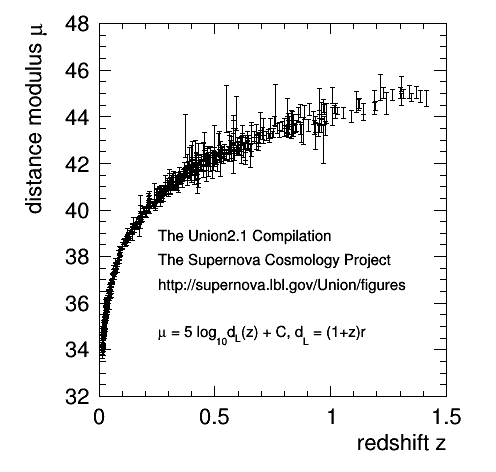

In [9]:
gd = plotData(data, code)

### $\chi^2$ function to be minimized

In [10]:
def chisq(npar, grad, fval, xval, flag):
    fval[0] = 0.0
    ndata = len(data[0])
    for i in xrange(ndata):
        z  = data[0][i]
        x  = data[1][i]
        dx = data[3][i]
        mu = code.distanceModulus(z, xval)
        c  = (x - mu)/dx
        fval[0] += c*c

### Setup Minuit
   * instantiate a Minuit object
   * specify parameters

In [11]:
def setupMinuit(modelname, params):
    from array import array
    
    print 'setup Minuit'
    
    PRINT_LEVEL = -1  # -1 => quiet, 1 => loud
    UP = 1.0 # appropriate for 68% CL using chisq
    npar = len(params)
    minuit = ROOT.TMinuit(npar)
    minuit.SetFCN(chisq)
    minuit.SetErrorDef(UP)
    minuit.SetPrintLevel(PRINT_LEVEL)

    status = ROOT.Long() # needed for integers passed by refence (int& ii)
    print "%10s\t%-10s %10s %10s %10s %10s" % \
    ('free', 'param', 'guess', 'step', 'min', 'max')
    
    for ii, t in enumerate(params):
        print "%10s\t%-10s %10.2e %10.3e %10.3e %10.3e" % t
        free, name, guess, step, pmin, pmax = t
        minuit.mnparm(ii, name, guess, step, pmin, pmax, status)
        if status != 0:
            sys.exit("** mnparm(%s) status = %d" % (name, status))

        if not free:
            stat = minuit.FixParameter(ii)
            if stat != 0:
                sys.exit("** FixParameter(%s) status = %d" % (name, stat))
    return minuit

In [12]:
minuit = setupMinuit(MODEL, params)

setup Minuit
      free	param           guess       step        min        max
      True	OM           1.00e+00  1.000e-03  0.000e+00  1.000e+01
      True	OL           0.00e+00  1.000e-03 -1.000e+01  1.000e+01
      True	H0           7.00e+01  1.000e-02  0.000e+00  2.000e+02
 **********
 **    1 **SET ERRDEF           1
 **********


### Perform fit

In [13]:
def performFit(modelname, minuit, params):
    from array import array
    
    LINE   = "="*80
    print LINE
    print "running Minuit"
   
    # define parameters
    MAXITER   = 1000
    TOLERANCE = 1.e-4
    args = array('d')
    args.append(MAXITER)
    args.append(TOLERANCE)
    
    swatch = ROOT.TStopwatch()
    swatch.Start()
    
    status = ROOT.Long()
    minuit.mnexcm("MIGRAD", args, 2, status)
    if status != 0: sys.exit("** mnexcm status = %d" % status)
    print "real time: %10.3f s" % swatch.RealTime()

    # print results
    print
    filename = '%s_fit.txt' % modelname
    out   = open(filename, 'w')
    value = ROOT.Double() # needed for passing doubles by reference
    error = ROOT.Double()
    results = []
    print "%10s\t%11s\t%11s" % ('name', 'value', 'uncertainty')
    for ii, t in enumerate(params):
        name = t[1]
        minuit.GetParameter(ii, value, error)
        record = "%10s\t%11.3f\t%11.3f" % (name, value, error)
        out.write('%s\n' % record)
        print record
        results.append((float(value), float(error)))
    out.close()
    print LINE
    return results

In [14]:
results = performFit(MODEL, minuit, params)

running Minuit
real time:      0.227 s

      name	      value	uncertainty
        OM	      0.279	      0.070
        OL	      0.725	      0.117
        H0	     69.824	      0.438


## Plot Results

In [15]:
def annotate(modelname, scribe, results, offset=0.01):
    if modelname == 'LCDM':
        OM = tuple(results[0])
        OL = tuple(results[1])
        scribe.write("#LambdaCDM model")
        scribe.write("")
        scribe.write("#Omega(a) = #frac{#Omega_{M}}{a^{3}} + "
              "#frac{(1 - #Omega_{M} - #Omega_{#Lambda})}{a^{2}}"
                      " + #Omega_{#Lambda}",
                      offset)
        scribe.write("")
        scribe.write("#Omega_{M} = %5.2f #pm %-5.2f" % OM,
                      offset)
        scribe.write("#Omega_{#Lambda} = %5.2f #pm %-5.2f " % OL,
                      offset)
    else:
        n, dn = results[3]
        x = 3.0/(2*n)
        G = ROOT.TMath.Gamma(x)
        T = G*ROOT.TMath.Sqrt(2.718)*2**x/n        
        scribe.write("phantom model")
        scribe.write("")
        scribe.write("#Omega(a) = #frac{#Omega_{M}}{a^{3}} + "
                  "#frac{e^{a^{n}-1} - #Omega_{M}}{a^{3}}", offset)
        scribe.write("")
        scribe.write("H_{0}t = #sqrt{e} 2^{3/(2n)} #Gamma(3/(2n), a^{n}/2)/n", offset)
        scribe.write("")
        scribe.write("H_{0}t_{rip} = #sqrt{e} 2^{3/(2n)} #Gamma(3/(2n))/n = %4.2f" % T,
                      offset)
        scribe.write("")
        scribe.write("where #Gamma(s, x) = #int_{0}^{x} t^{s-1} e^{-t} dt", offset)
        scribe.write("and n = %4.2f" % n, offset)    

In [16]:
def plotModel(modelname, code, results, npar,
              gd, data, 
              zmin=ZMIN, zmax=ZMAX, mumin=MUMIN, mumax=MUMAX):
    from array import array
    p = array('d')
    for value, error in results:
        p.append(value)

    z, x, dz, dx = data
    ndata = len(z)
    
    # compute chisq
    chi2 = 0.0
    for i in xrange(ndata):    
        mu = code.distanceModulus(z[i], p)
        c = (x[i] - mu)/dx[i]
        chi2 += c*c        
    NDF = ndata - npar # number of degrees of freedom
    
    # compute curve
    nz = 100
    zstep = (zmax - zmin) / nz
    zz = array('d')
    mu = array('d')
    for ii in xrange(nz):
        zz.append( (ii+0.5)*zstep )
        mu.append( code.distanceModulus(zz[-1], p) )

    g = mkgraph(zz, mu,
                "redshift z", 
                "distance modulus #mu", 
                zmin, zmax, color=ROOT.kRed, lwidth=2)
    ROOT.SetOwnership(g, 0)
    g.SetName('model')
    g.SetTitle('')
    
    c = ROOT.TCanvas("fig_%s_fit" % modelname, "SN1a model fit", 500, 500)
    ROOT.SetOwnership(c, 0)
    
    c.cd()
    g.Draw('ac')
    gd.Draw('psame')
    g.Draw('csame')
    
    xpos = 0.32
    ypos = 0.50
    textsize = 0.035
    scribe = Scribe(xpos, ypos, textsize)
    ROOT.SetOwnership(scribe, 0)
    scribe.write("The Union2.1 Compilation")
    scribe.write("The Supernova Cosmology Project")
    scribe.write("http://supernova.lbl.gov/Union/figures")
    scribe.write("")
    scribe.write("#chi^{2} / NDF = %5.1f / %d = %5.2f" % (chi2, NDF, chi2/NDF))  

    c.Draw()
    c.SaveAs(".pdf")

Info in <TCanvas::Print>: pdf file ./fig_LCDM_fit.pdf has been created


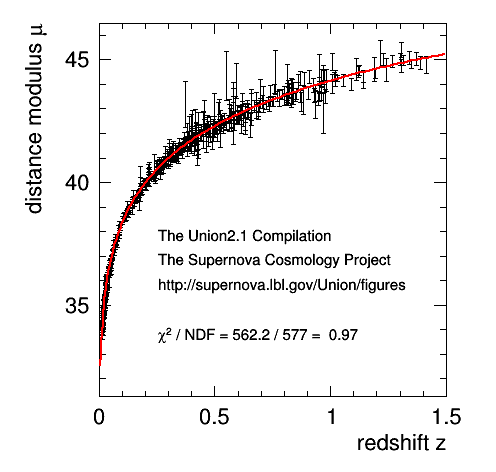

In [17]:
plotModel(MODEL, code, results, minuit.GetNumFreePars(), gd, data)

In [18]:
def plotScaleFactor(modelname, code, results, amax=10, tmax=2):
    from array import array

    p = array('d')
    for value, error in results:
        p.append(value)
        
    # create a vs H0 t plot
    a = array('d'); a.fromlist(code.N*[0])
    t = array('d'); t.fromlist(code.N*[0])
    code.scaleFactor(amax, p, t, a)
    g = mkgraph(t, a,
                "H_{0}t}", "a(t)", 
                0, tmax, color=ROOT.kBlue, lwidth=2)
    ROOT.SetOwnership(g, 0)
    g.SetName('scaleFactor')

    # create horizontal line at a = 1
    x = array('d'); x.append(0); x.append(tmax)
    y = array('d'); y.append(1); y.append(1)
    glineH = mkgraph(x, y, '', '', 0, tmax, 
                     color=ROOT.kMagenta+1, lwidth=2)
    ROOT.SetOwnership(glineH, 0)
    glineH.SetName('line')
    
    c = ROOT.TCanvas("fig_%s_scaleFactor" % modelname, 
                     "SN1a scalefactor",
                     500, 500)
    ROOT.SetOwnership(c, 0)
    c.cd()
    htmp = mkhist1('htmp', 'H_{0}t', 'a(t)',
                       50, 0, tmax, ymin=0, ymax=10)
    ROOT.SetOwnership(htmp, 0)
    htmp.Draw()
    g.Draw('csame')
    glineH.Draw('csame')

    offset = 0.05
    xpos = 0.25
    ypos = 0.87
    scribe = Scribe(xpos, ypos)
    ROOT.SetOwnership(scribe, 0)
    annotate(modelname, scribe, results, offset)
    c.Draw()
    c.SaveAs(".pdf")    

Info in <TCanvas::Print>: pdf file ./fig_LCDM_scaleFactor.pdf has been created


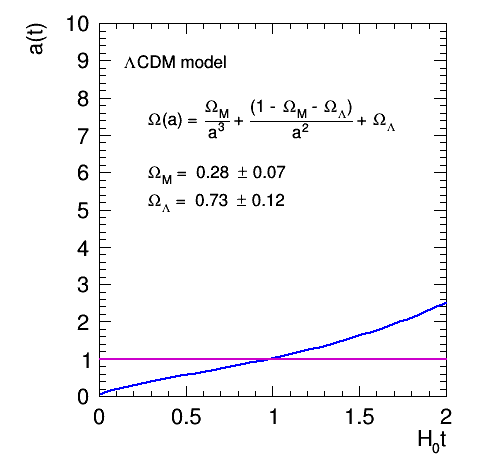

In [19]:
plotScaleFactor(MODEL, code, results)